### Import necessary libraries



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset


In [5]:
data = pd.read_csv(r"C:\Users\asus\Documents\auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Preprocessing the data

In [6]:
data['horsepower'] = data['horsepower'].replace('?', np.nan)

# Convert horsepower to numeric
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Fill missing values with the mean of the column
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

### Adding features

In [7]:
def classify_mpg(mpg):
    if mpg < 25:
        return "Low"
    elif 25 <= mpg < 40:
        return "Medium"
    else:
        return "High"

data['mpg_category'] = data['mpg'].apply(classify_mpg)
data.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_category
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,Low
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,Low
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,Low
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,Low
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,Low
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,Medium
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,High
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,Medium
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,Medium


### Preprocessing data

In [8]:
data = data.drop(columns=['mpg', 'car name'])  # Drop original mpg and non-numeric columns


In [9]:
data = data.dropna()


In [10]:
label_encoder = LabelEncoder()
data['mpg_category'] = label_encoder.fit_transform(data['mpg_category'])


In [11]:
X = data.drop(columns=['mpg_category'])
y = data['mpg_category']

### Train-test split

In [12]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training model

In [13]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.85      0.89        68
           2       0.81      0.90      0.85        51

    accuracy                           0.87       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.86      0.87      0.86       120

Confusion Matrix:
 [[ 0  0  1]
 [ 0 58 10]
 [ 0  5 46]]
Accuracy Score: 0.8666666666666667


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


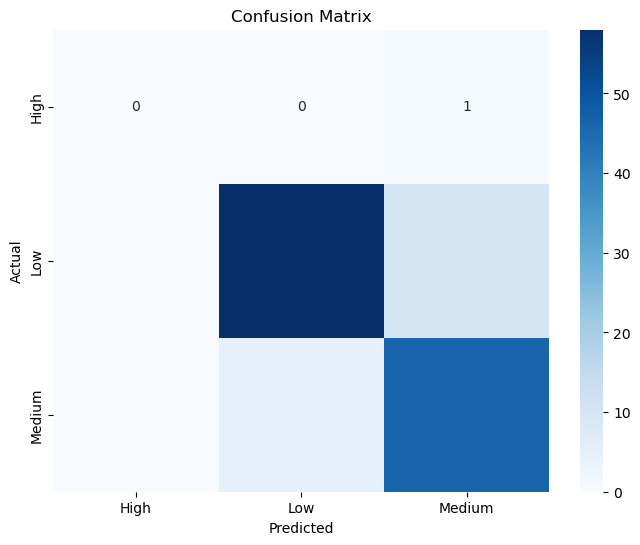

In [14]:
# Retrieve class labels from the label encoder
class_labels = label_encoder.classes_  # This gives ["Low", "Medium", "High"]

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
